In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

np.random.seed(21)

In [2]:
N = 200 
C = 3    
d = 2    
reg = 0.05  
lr = 0.1   
batch_size = 100
num_iters = 1000
print_every = 100

means = [[2, 2], [4, 1], [1, 4]] 
cov = [[0.3, 0.2], [0.2, 0.3]] 
X0 = np.random.multivariate_normal(means[0], cov, N) 
X1 = np.random.multivariate_normal(means[1], cov, N)  
X2 = np.random.multivariate_normal(means[2], cov, N)  
X = np.hstack((X0.T, X1.T, X2.T))  
y = np.concatenate((np.zeros(N, dtype=int), np.ones(N, dtype=int), 2 * np.ones(N, dtype=int)))  

X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=109)
X_train = X_train.T 
y_train = y_train    
X_test = X_test.T    
y_test = y_test      

In [3]:
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape
    Z = W.T.dot(X)  
    correct_class_score = np.choose(y, Z).reshape(N, 1).T  
    margins = np.maximum(0, Z - correct_class_score + 1)  
    margins[y, np.arange(margins.shape[1])] = 0  
    
    loss = np.sum(margins, axis=(0, 1)) / N
    loss += 0.5 * reg * np.sum(W * W)
    
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis=0)
    dW = X.dot(F.T) / N + reg * W
    return loss, dW

def multiclass_svm_GD_vectorized(X, y, Winit, reg, lr=0.1, batch_size=100, num_iters=1000, print_every=100):
    W = Winit
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]
        loss_history[it], dW = svm_loss_vectorized(W, X_batch, y_batch, reg)
        W -= lr * dW
        if it % print_every == 1:
            print(f'it {it}/{num_iters}, loss = {loss_history[it]:.4f}')
    return W, loss_history

it 1/1000, loss = 2.7166
it 101/1000, loss = 0.1980
it 201/1000, loss = 0.1991
it 301/1000, loss = 0.2356
it 401/1000, loss = 0.2289
it 501/1000, loss = 0.2213
it 601/1000, loss = 0.2368
it 701/1000, loss = 0.2279
it 801/1000, loss = 0.2830
it 901/1000, loss = 0.2389
Độ chính xác trên toàn bộ tập dữ liệu: 0.9883
Ma trận nhầm lẫn:
 [[196   1   3]
 [  0 200   0]
 [  3   0 197]]


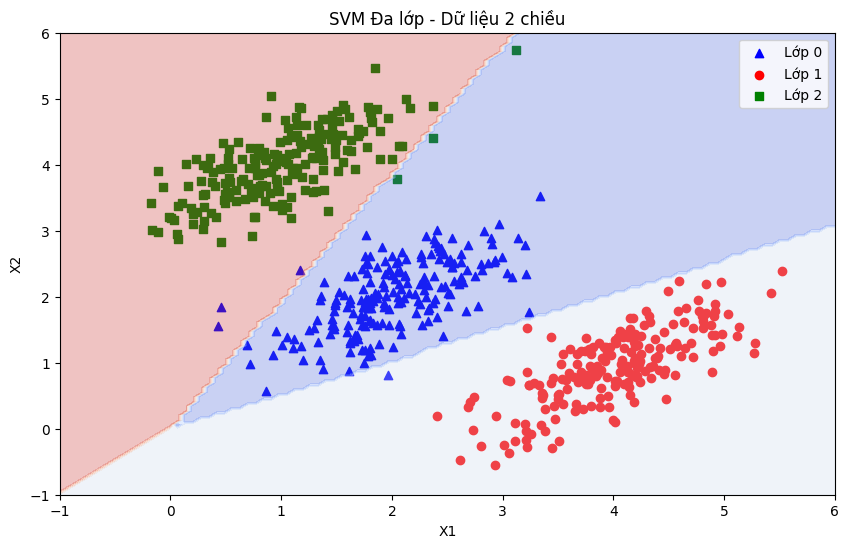

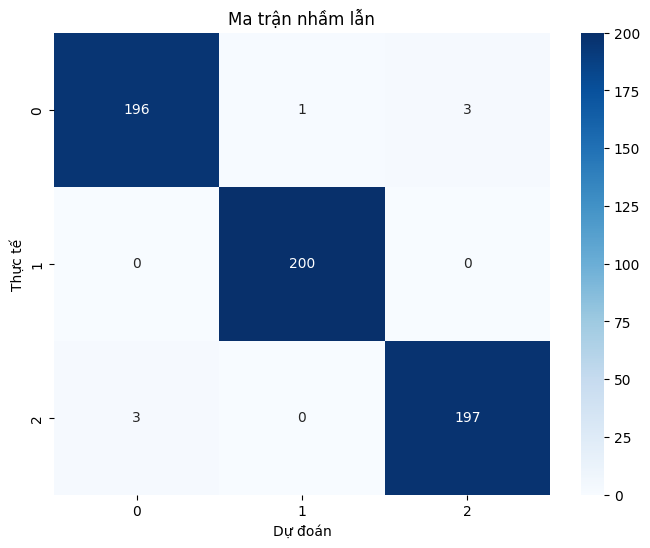

In [4]:
W = np.random.randn(d, C)  
W_opt, loss_history = multiclass_svm_GD_vectorized(X_train, y_train, W, reg, lr, batch_size, num_iters, print_every)

Z = W_opt.T.dot(X) 
y_pred = np.argmax(Z, axis=0)  

accuracy = accuracy_score(y, y_pred)
print(f"Độ chính xác trên toàn bộ tập dữ liệu: {accuracy:.4f}")

conf_matrix = confusion_matrix(y, y_pred)
print("Ma trận nhầm lẫn:\n", conf_matrix)

plt.figure(figsize=(10, 6))
colors = ['b', 'r', 'g']
markers = ['^', 'o', 's']
for c in range(C):
    plt.scatter(X[0, y == c], X[1, y == c], c=colors[c], marker=markers[c], label=f'Lớp {c}')

x1 = np.linspace(-1, 6, 100)
x2 = np.linspace(-1, 6, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.vstack([X1.ravel(), X2.ravel()]) 
Z_grid = W_opt.T.dot(X_grid)  
Z_grid = np.argmax(Z_grid, axis=0).reshape(X1.shape)  

plt.contourf(X1, X2, Z_grid, alpha=0.3, cmap='coolwarm')
plt.axis([-1, 6, -1, 6])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('SVM Đa lớp - Dữ liệu 2 chiều')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.show()